## Market Segmentation Project

#### Created by: Ardian Kris Bramantyo

#### Date: June 24, 2022

### Project Overview

I will help the Bank's marketing team based in New York City to launch a targeted ad marketing campaign by dividing their customers into few distinctive groups. The Goals of this project are: (1) Perform Unsupervised Learning Technique, & (2) Develop Market Segmentation Model. 

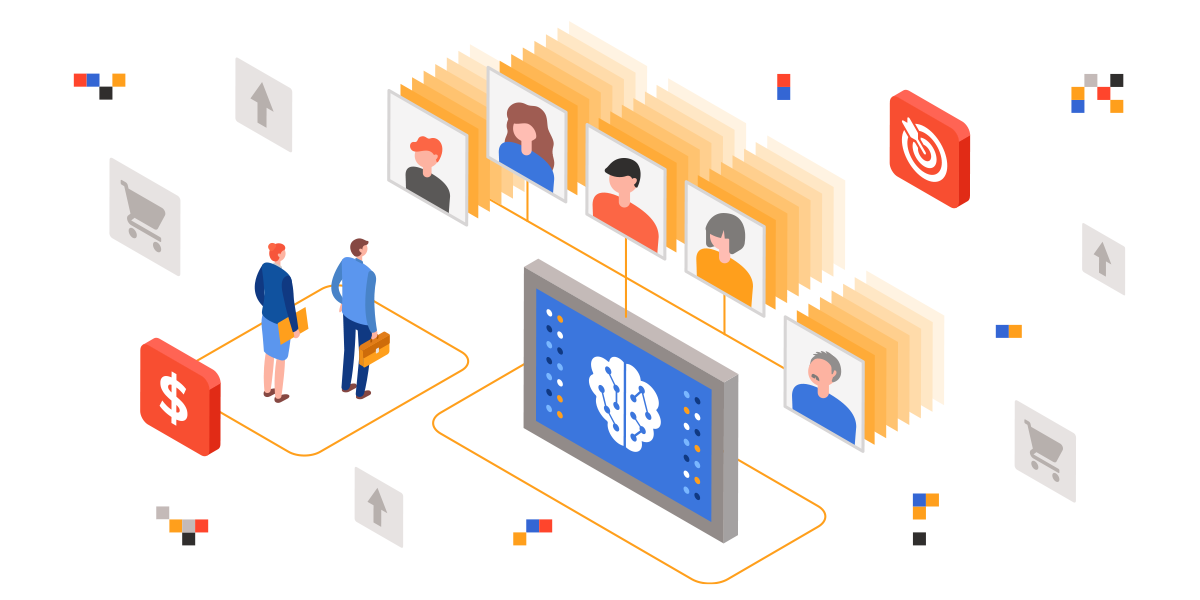

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA #PCA = Principal Component Analysis

### Import Dataset

In [2]:
df = pd.read_csv('Marketing_data.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Dataset Overview
 - CUSTID: Identification of Credit Card holder 
 - BALANCE: Balance amount left in customer's account to make purchases
 - BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
 - PURCHASES: Amount of purchases made from account
 - ONEOFFPURCHASES: Maximum purchase amount done in one-go
 - INSTALLMENTS_PURCHASES: Amount of purchase done in installment
 - CASH_ADVANCE: Cash in advance given by the user
 - PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
 - PURCHASES_FREQUENCY: How frequently  the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
 - ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
 - PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
 - CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
 - CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
 - PURCHASES_TRX: Number of purchase transactions made
 - CREDIT_LIMIT: Limit of Credit Card for user
 - PAYMENTS: Amount of Payment done by user
 - MINIMUM_PAYMENTS: Minimum amount of payments made by user  
 - PRC_FULL_PAYMENT: Percent of full payment paid by user
 - TENURE: Tenure of credit card service for user

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Check for the customer who makes the biggest oneoff_purchase (40761.25)
df[df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
# Check for the maximum value of CASH_ADVANCE
df['CASH_ADVANCE'].max()

47137.21176

In [8]:
# Check for the customer who makes the biggest CASH_ADVANCE (47137.21176)
df[df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### Exploratory Data Analysis

#### Check for missing data

<AxesSubplot:>

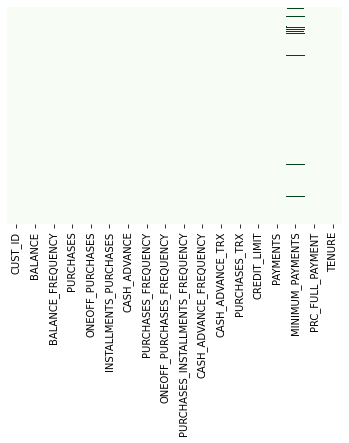

In [9]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Greens')

#### Find the total missing element

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
#Fill the missing elements using mean of the 'MINIMUM_PAYMENT'
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [12]:
#Checking back
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
#Fill the missing elements using mean of the 'CREDIT_LIMIT'
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [14]:
#Checking back
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

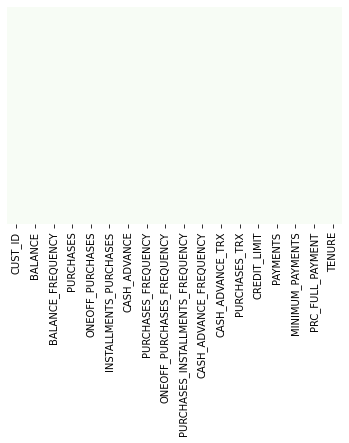

In [15]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Greens')

In [16]:
#Check for duplicated entries
df.duplicated().sum()

0

In [17]:
#Drop Customer ID
df = df.drop('CUST_ID', axis=1)

In [18]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
n = len(df.columns)
n

17

In [20]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Distplot

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

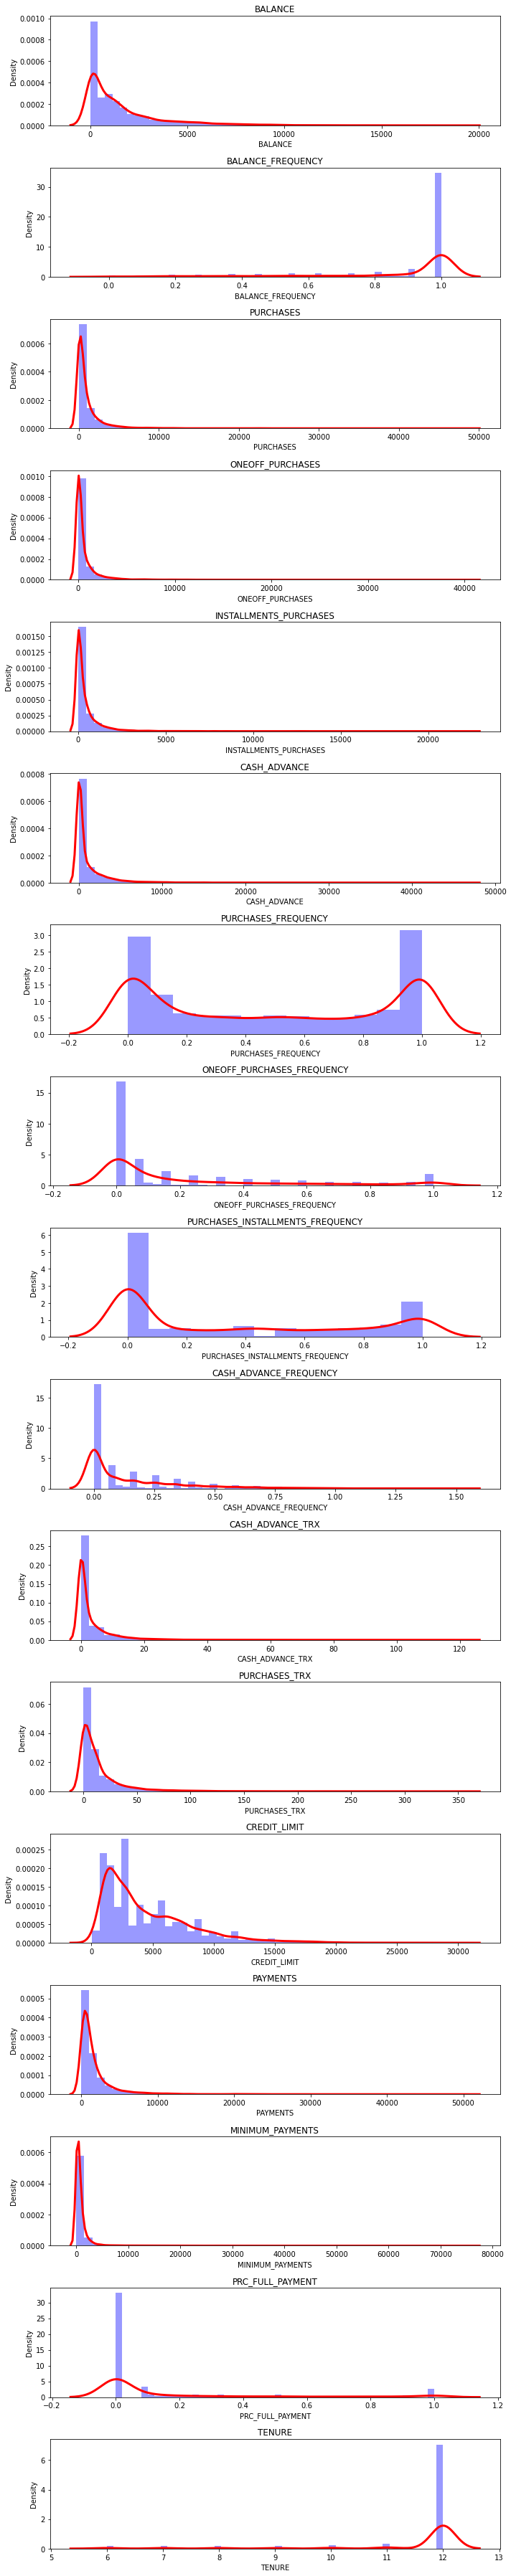

In [21]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {'color':'r', 'lw':3, 'label':'KDE'}, hist_kws={'color':'b'})
    plt.title(df.columns[i])

    plt.tight_layout()

In [22]:
correlation = df.corr()

<AxesSubplot:>

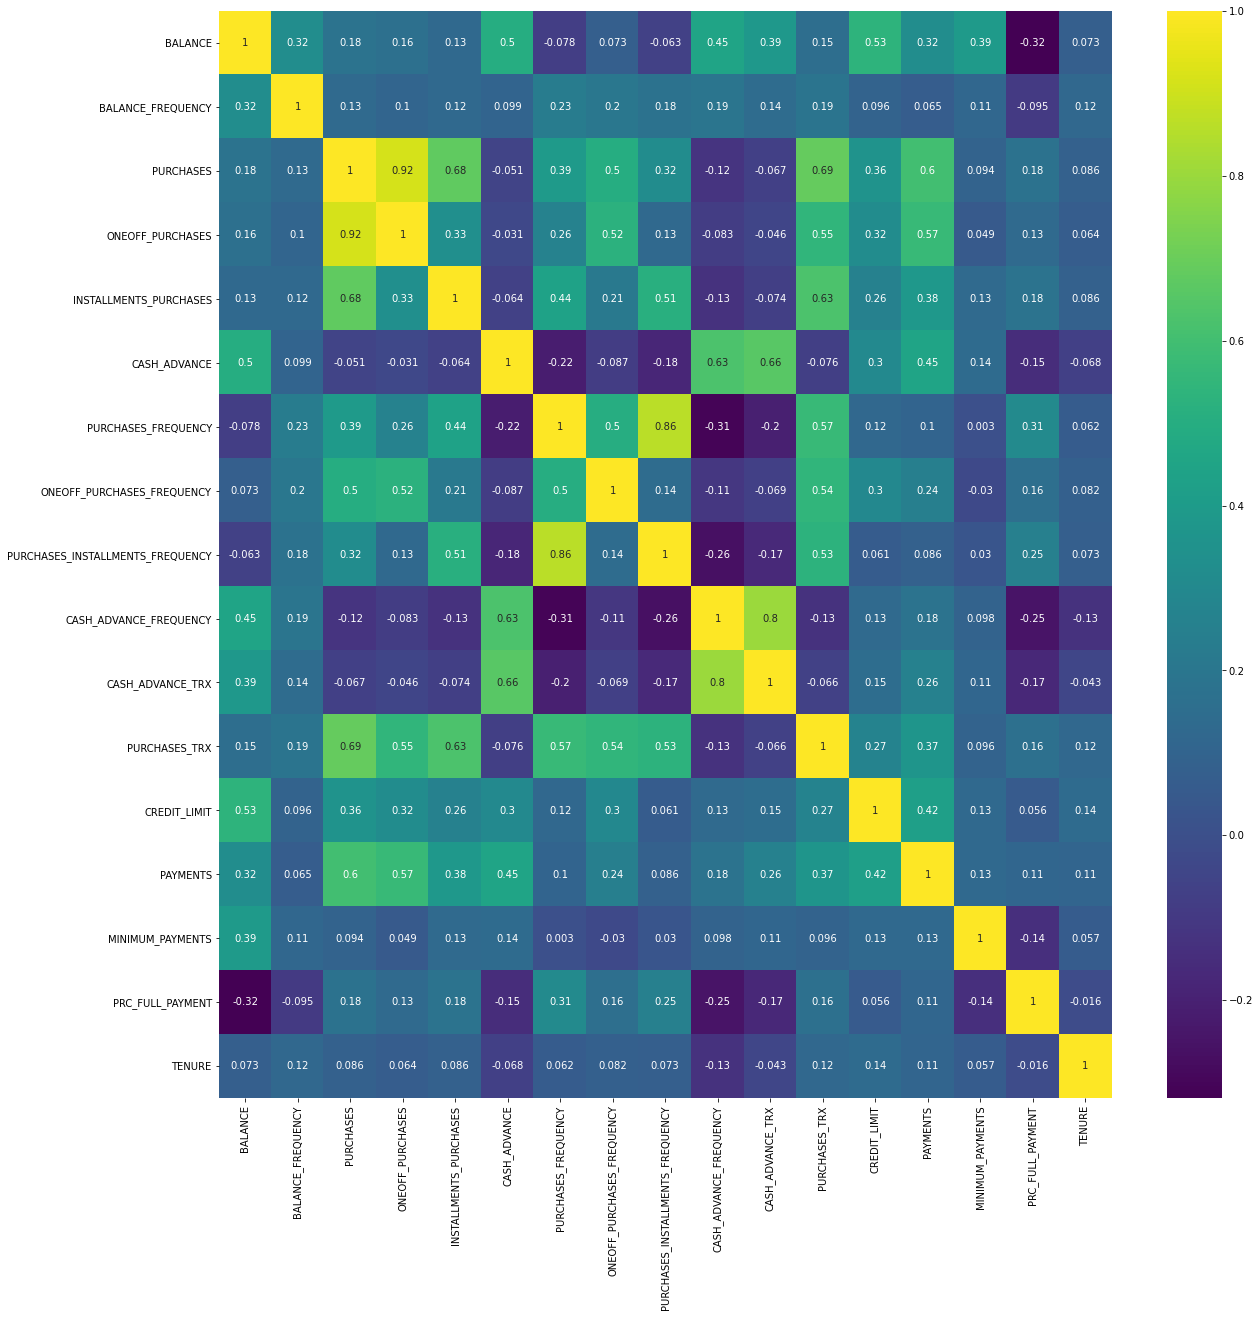

In [23]:
ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, annot = True, cmap="viridis")

### Find the Optimal Number of Clusters using Elbow Method

In [25]:
#Scale the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [26]:
df_scaled.shape

(8950, 17)

In [27]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [28]:
# Apply Elbow Method
scores_1 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_)

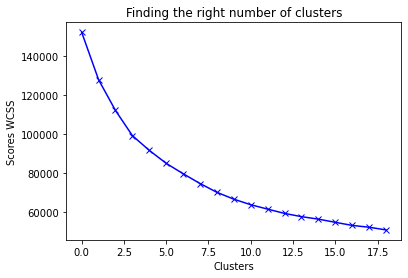

In [29]:
plt.plot(scores_1, 'bx-') #color blue
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

### Apply K-Means Method

In [30]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [31]:
kmeans.cluster_centers_.shape

(8, 17)

In [32]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002376,0.403755,-0.356445,-0.241062,-0.399825,-0.104729,-0.848743,-0.392676,-0.751810,0.088880,-0.038496,-0.480668,-0.311649,-0.254926,-0.013647,-0.456285,0.273893
1,1.042239,0.465006,2.500780,1.806350,2.594499,-0.161300,1.164798,1.562962,1.273275,-0.284847,-0.150801,3.128411,1.303209,1.436890,0.559682,0.251719,0.337526
2,-0.143196,0.399498,0.542223,0.672259,0.046838,-0.332751,0.980831,1.907809,0.170502,-0.414547,-0.332417,0.618850,0.425945,0.143283,-0.161110,0.450876,0.268444
3,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
4,-0.363132,0.332458,-0.033993,-0.242530,0.365003,-0.362213,0.997025,-0.383830,1.209869,-0.472751,-0.359673,0.191372,-0.260909,-0.214077,-0.030261,0.317374,0.255738
5,-0.333924,-0.345996,-0.288199,-0.214424,-0.287144,0.067515,-0.203348,-0.286554,-0.225256,0.309069,0.000876,-0.387867,-0.563134,-0.392745,-0.209087,0.013378,-3.200691
6,1.670732,0.396060,-0.219868,-0.157536,-0.230526,1.967567,-0.477158,-0.211612,-0.416128,1.889363,1.886232,-0.268874,1.017906,0.790248,0.542053,-0.394839,0.077872
7,-0.700918,-2.143735,-0.310468,-0.235060,-0.302135,-0.319880,-0.555387,-0.443244,-0.439618,-0.520753,-0.376148,-0.419400,-0.172441,-0.191642,-0.256427,0.284813,0.200105


In [33]:
# Perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1569.419728,0.972917,241.654711,192.324609,49.510847,759.249256,0.149709,0.085315,0.065649,0.152930,2.986121,2.762235,3360.542975,995.158348,832.403510,0.020259,11.883857
1,3733.806745,0.987426,6346.159662,3590.608789,2757.241014,640.617891,0.957840,0.668720,0.870470,0.078143,2.219718,92.470423,9236.056338,5892.801050,2168.520942,0.227338,11.969014
2,1266.424503,0.971908,2161.672066,1708.249481,453.422585,281.077557,0.884006,0.771594,0.432199,0.052189,0.980322,30.092129,6044.210441,2147.935423,488.745589,0.285588,11.876565
3,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
4,808.645477,0.956027,930.578441,189.887639,741.135662,219.292881,0.890505,0.087954,0.845270,0.040542,0.794323,19.466633,3545.154483,1113.410945,793.683658,0.246541,11.859562
5,869.441195,0.795307,387.463654,236.537740,151.406683,1120.452630,0.408737,0.116973,0.274915,0.196992,3.254808,5.068910,2445.535977,596.186218,376.937132,0.157627,7.233974
6,5041.961494,0.971094,533.452397,330.959678,202.605560,5104.950907,0.298844,0.139330,0.199057,0.513225,16.120977,8.026637,8198.007265,4020.834793,2127.438403,0.038231,11.621532
7,105.573461,0.369440,339.885313,202.285601,137.850812,308.067290,0.267447,0.070229,0.189722,0.030936,0.681895,4.285110,3867.038447,1178.359551,266.613855,0.237018,11.785110


In [34]:
labels.shape # Labels associated to each data point

(8950,)

In [35]:
labels.max()

7

In [36]:
labels.min()

0

In [37]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([2, 7, 6, ..., 5, 5, 5])

Concatenate the Clusters labels to the original dataframe

In [39]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


Histogram for various clusters

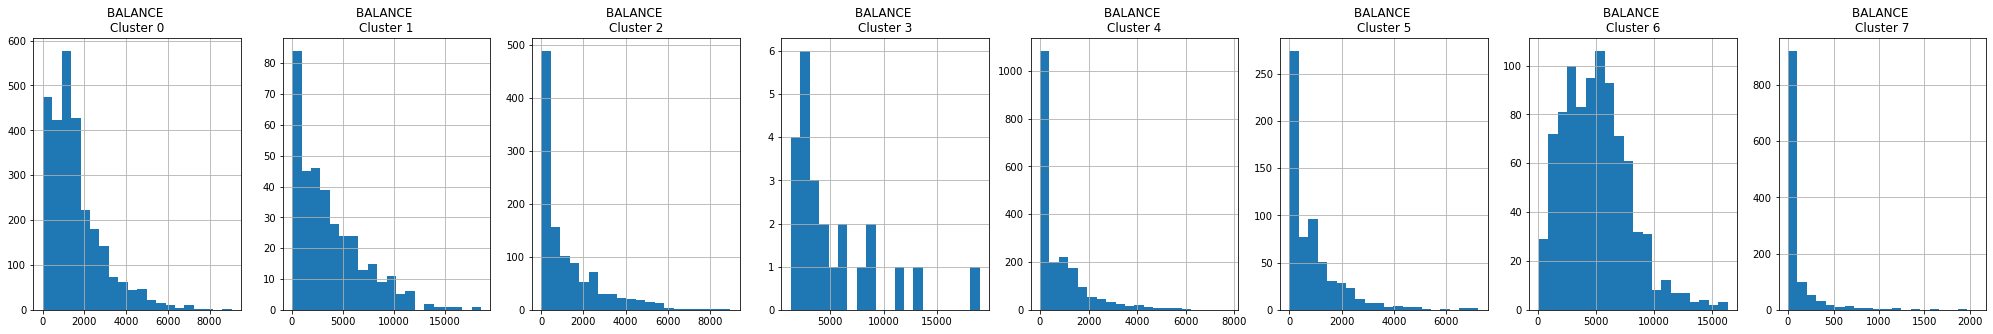

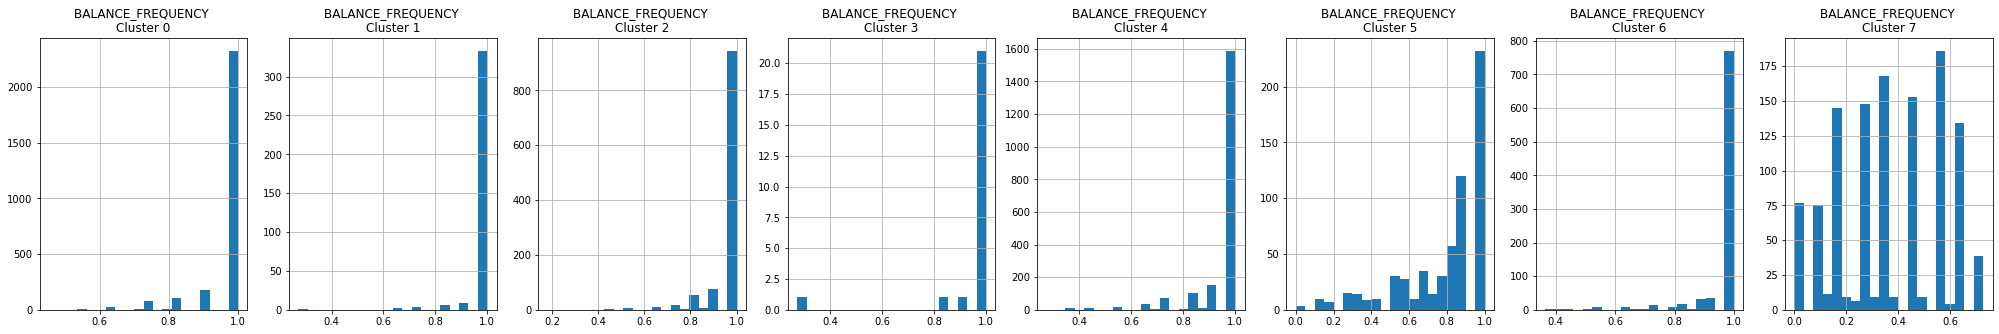

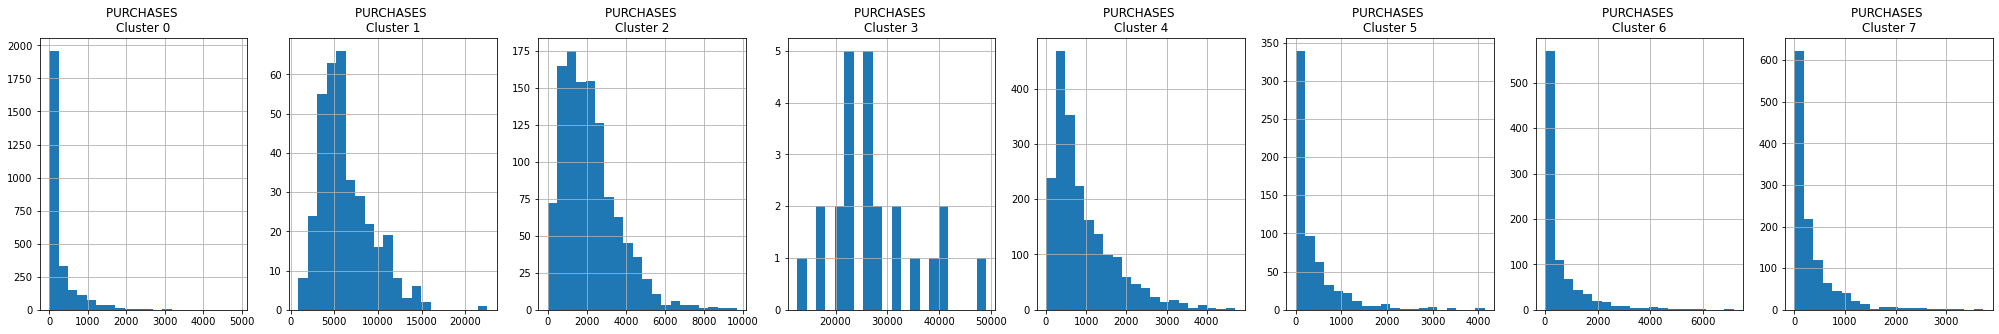

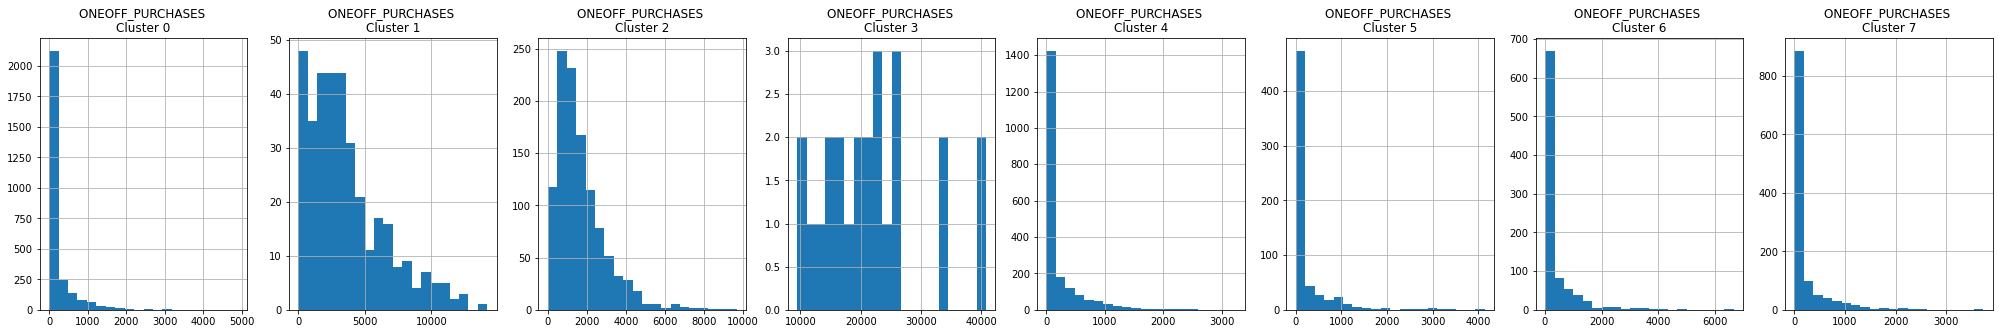

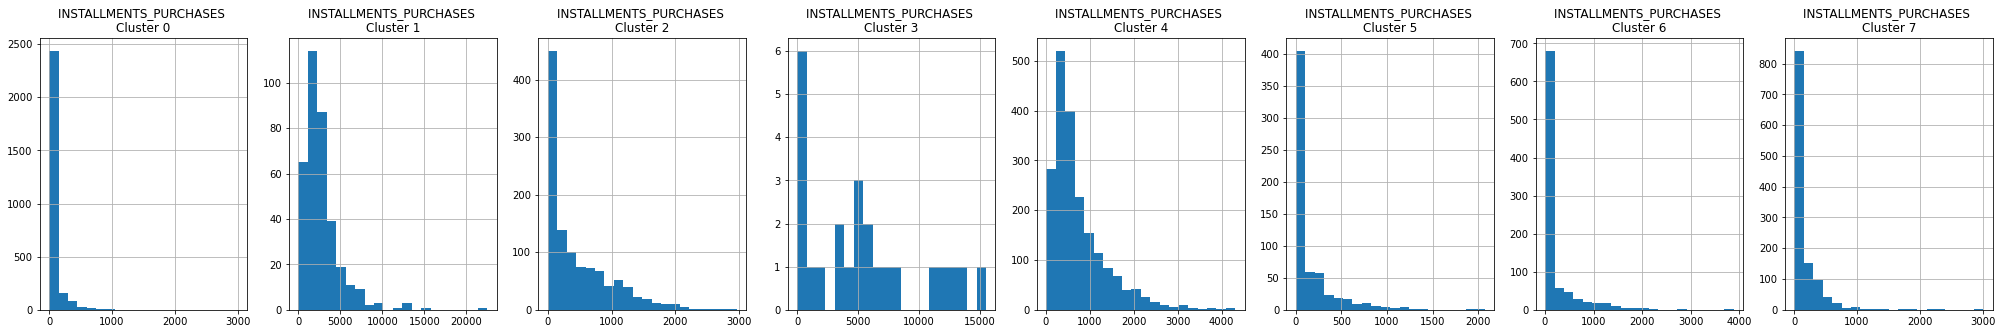

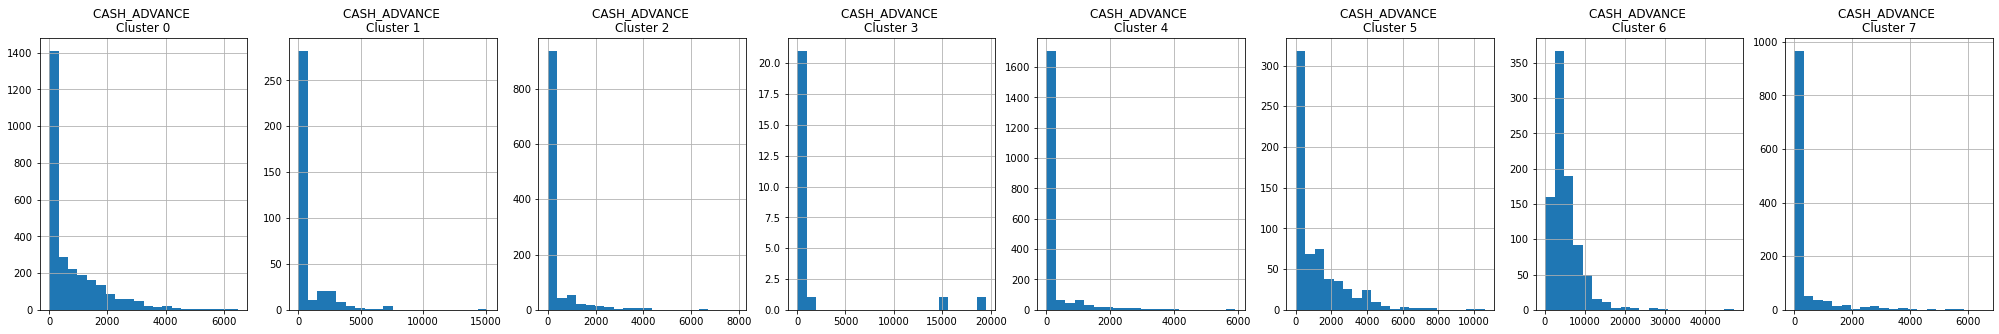

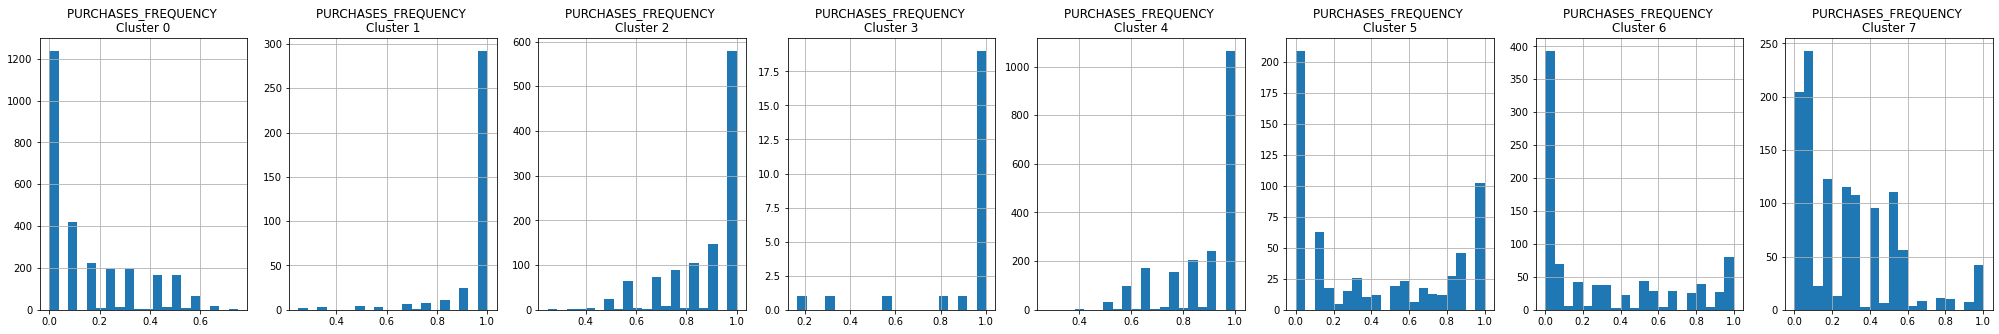

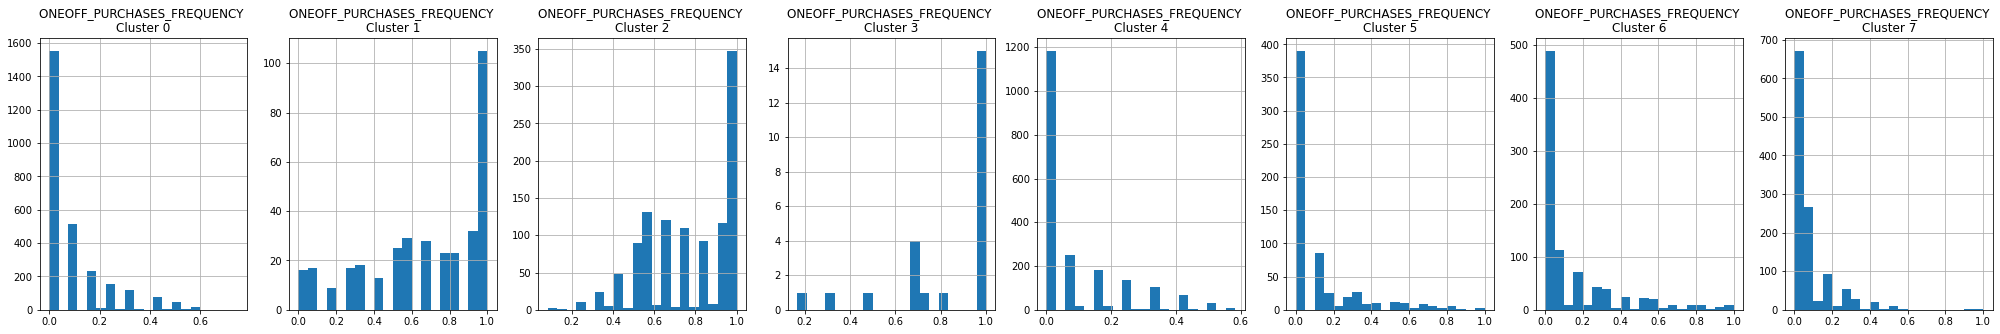

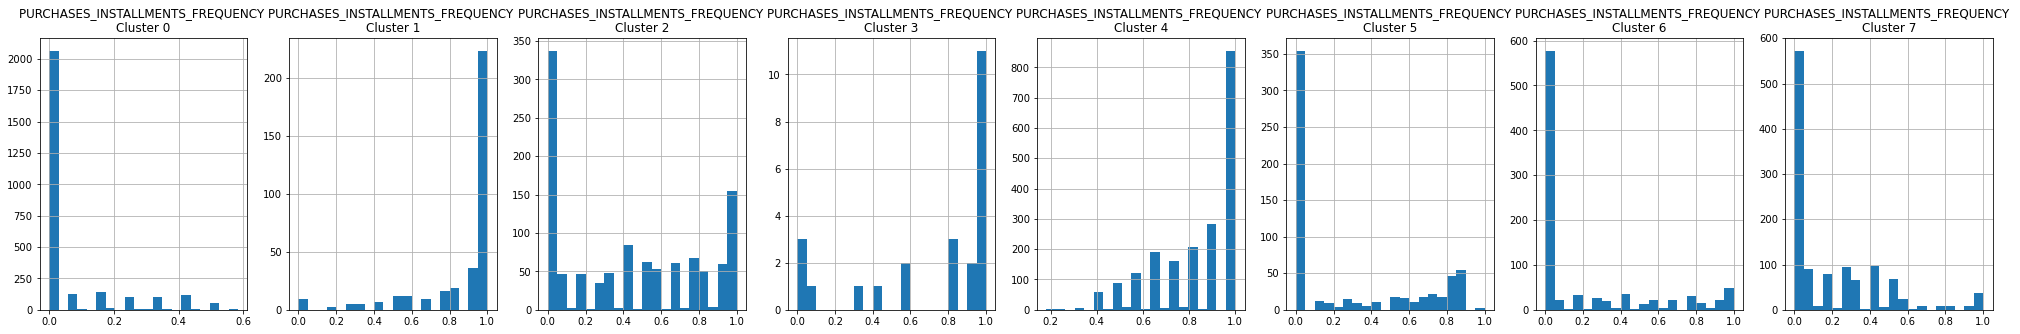

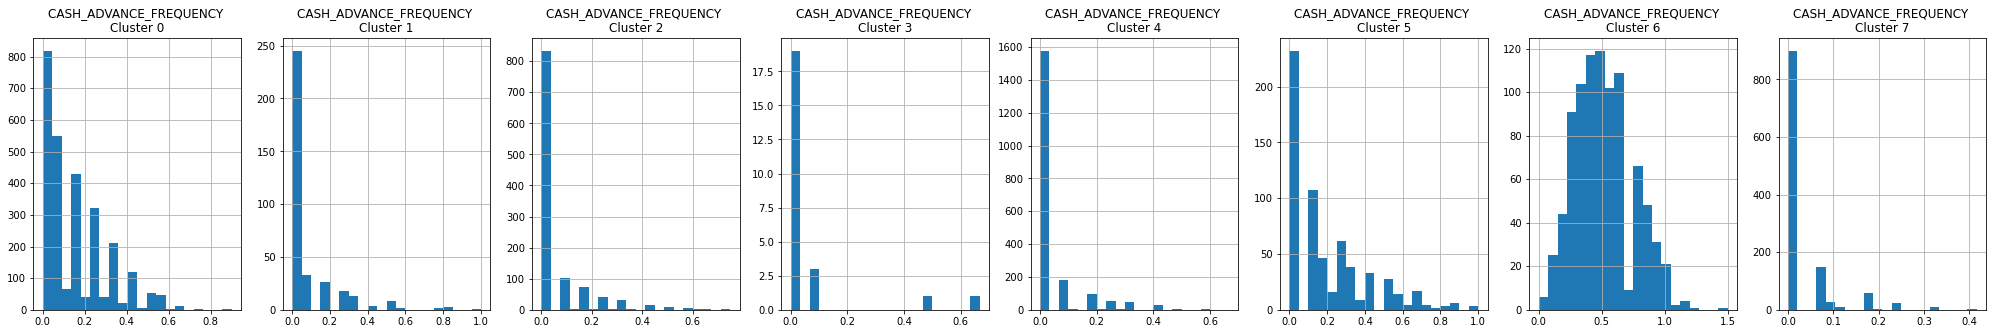

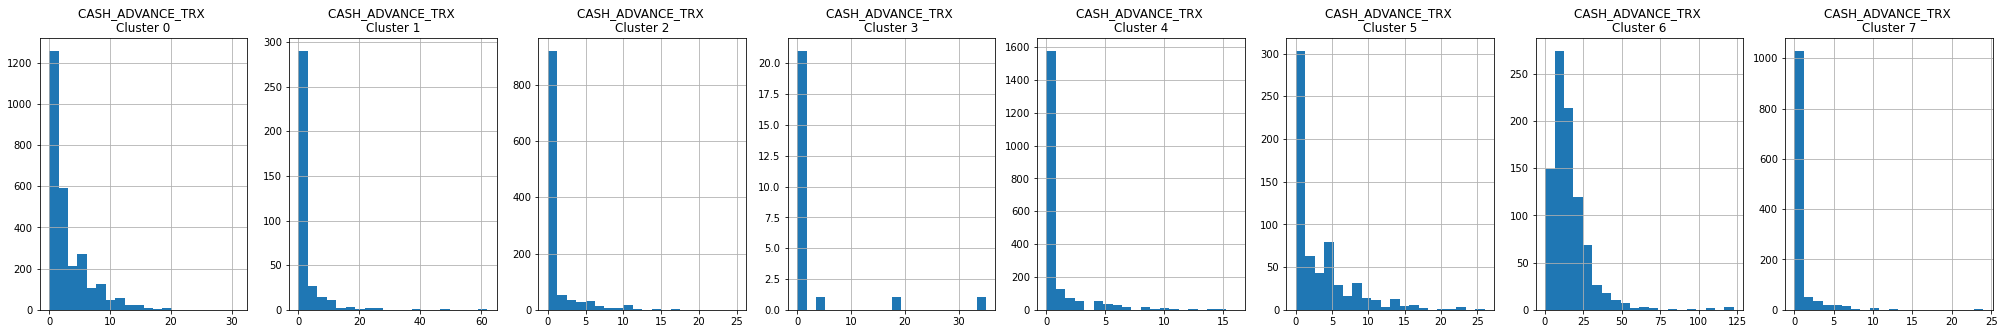

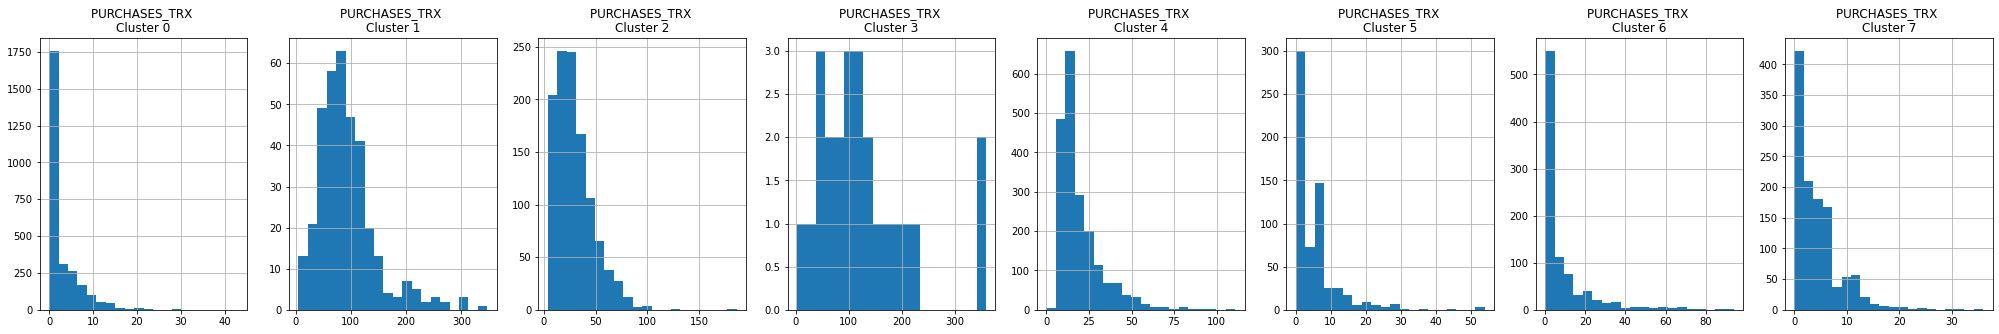

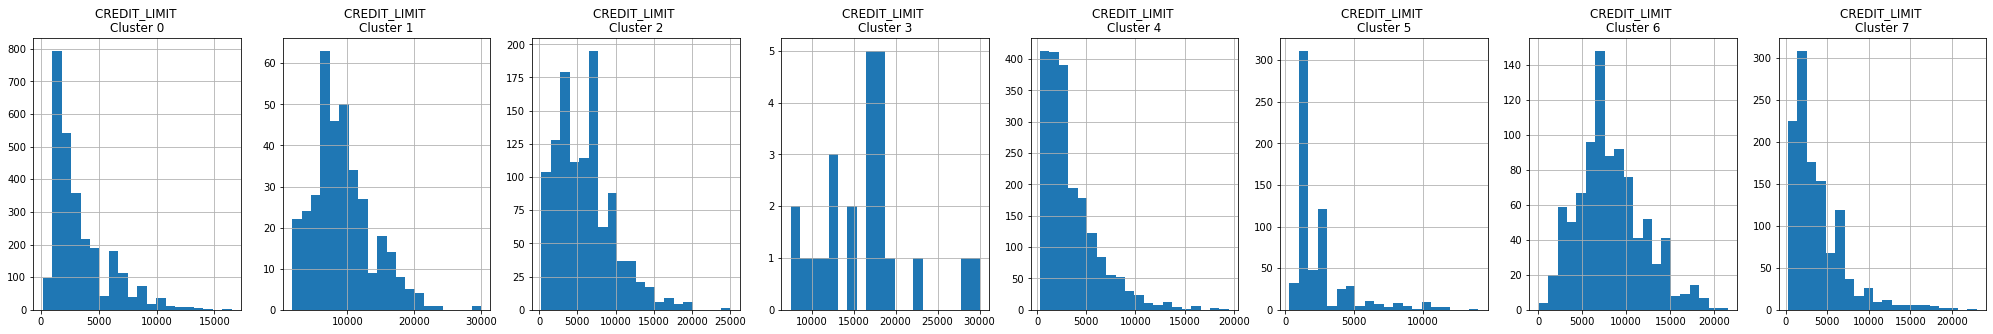

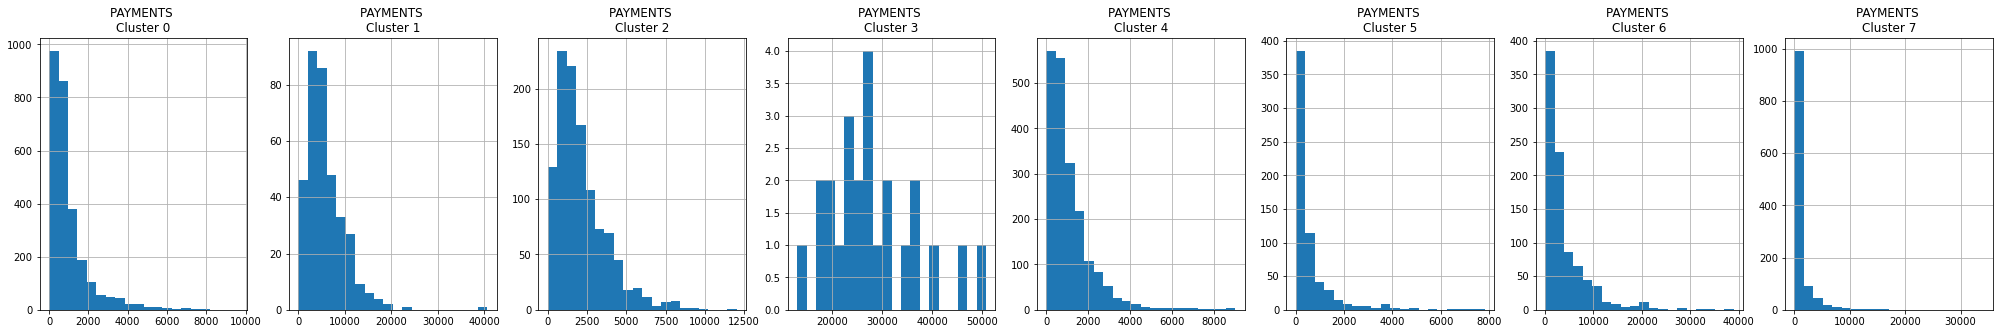

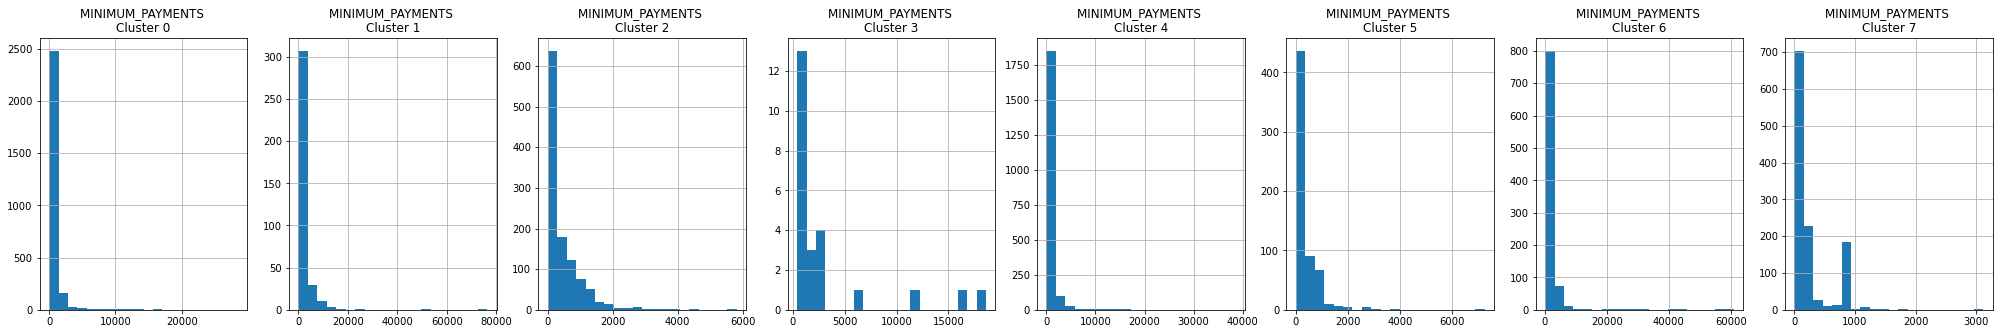

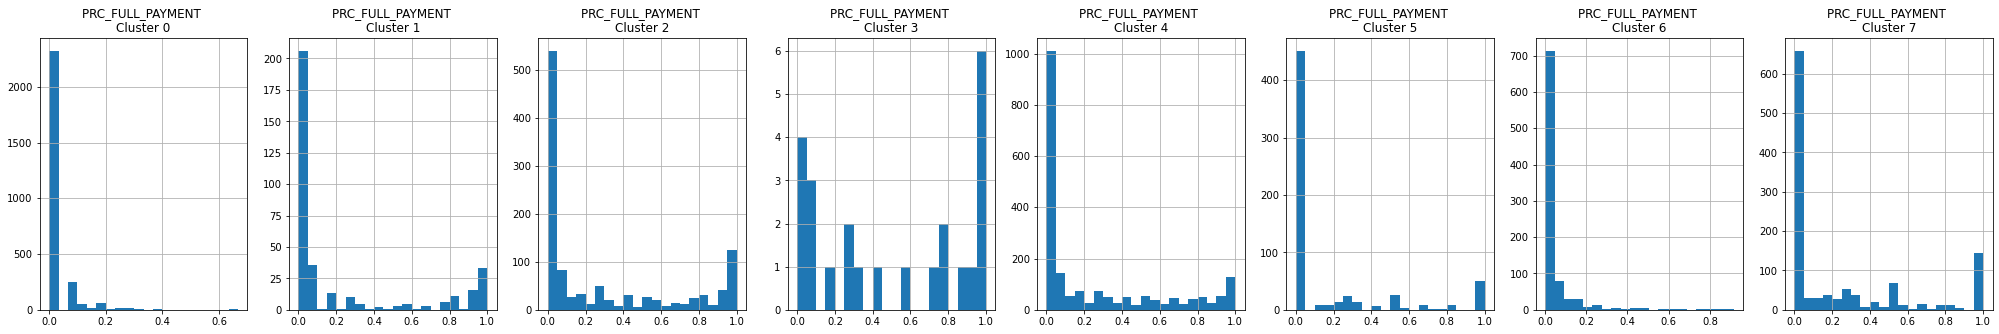

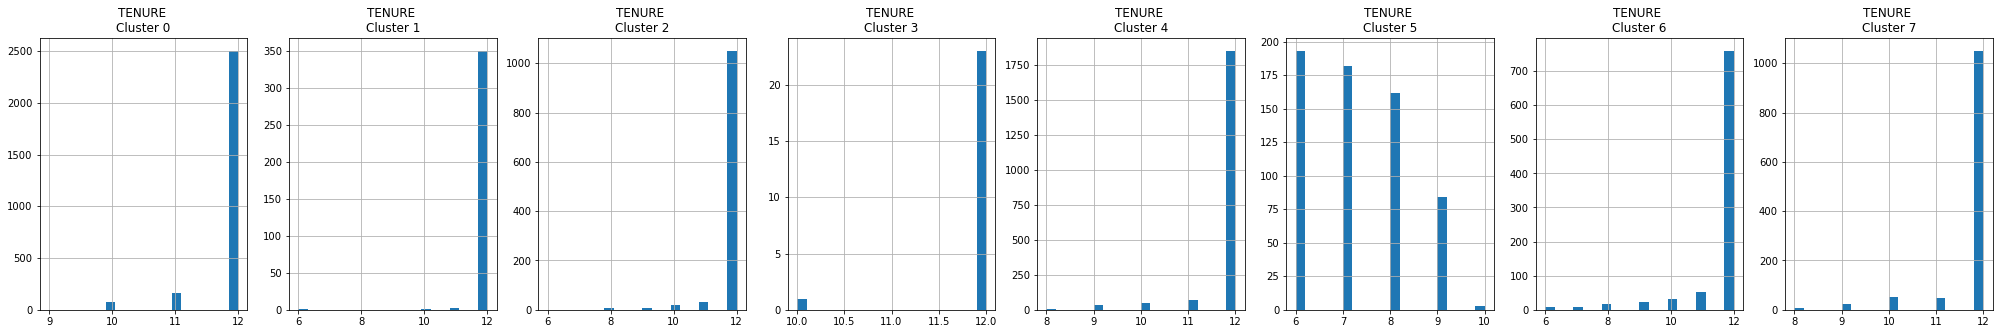

In [45]:
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8, j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {}'.format(i,j))
plt.show()

### Apply Pricipal Component Analysis
### Overview

 - PCA is an unsupervised machine learning algorithm.
 - PCA performs dimensionality reductions while attempting at keeping the original information unchanged.
 - PCA works by trying to find a new set of features called components.
 - Components are composites of the uncorrelated given input features.
 
 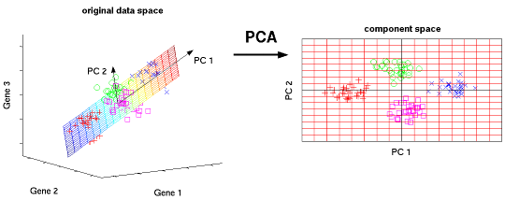

In [49]:
#Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222077, -1.07645101],
       [-1.1382974 ,  2.50647497],
       [ 0.96968766, -0.38352237],
       ...,
       [-0.92620315, -1.81078518],
       [-2.33655225, -0.65796442],
       [-0.55642124, -0.40046598]])

In [51]:
# Create a dataframe with the components
pca_df = pd.DataFrame(data=principal_comp, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076451
1,-1.138297,2.506475
2,0.969688,-0.383522
3,-0.873630,0.043165
4,-1.599433,-0.688581


In [52]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076451,0
1,-1.138297,2.506475,6
2,0.969688,-0.383522,2
3,-0.873630,0.043165,0
4,-1.599433,-0.688581,0


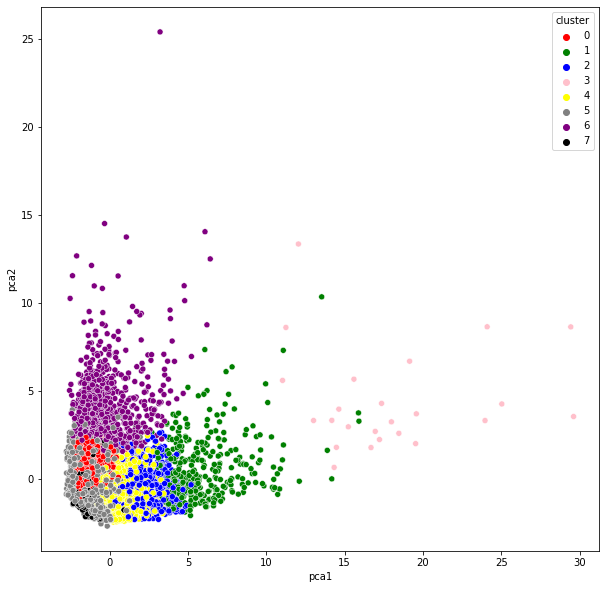

In [54]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data=pca_df, palette = ['red','green','blue','pink','yellow','gray','purple','black'])

## Autoencoders Intuition

 - Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning). 
 - Auto encoders use the same input data for the input and output
 
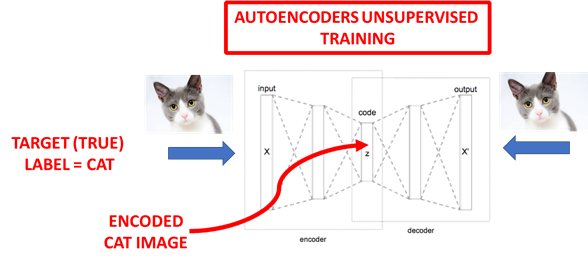

### The Code Layer

 - Auto encoders work by adding a bottleneck in the network.
 - This bottleneck forces the network to create a compressed (encoded) version of the original input
 - Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent)
 
 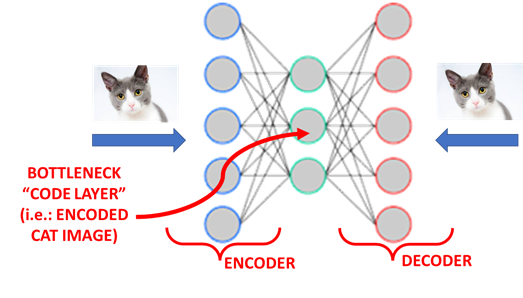

### Apply Autoencoders

In [57]:
#Use Keras as API to build model
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform 
from tensorflow.keras.optimizers import SGD

In [60]:
#Specify the input
input_df = Input(shape = (17,))

x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

#Encoded Layer
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

#AutoEncoder
autoencoder = Model(input_df, decoded)

#Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss ='mean_squared_error')

In [61]:
df_scaled.shape

(8950, 17)

In [62]:
autoencoder.fit(df_scaled, df_scaled, batch_size= 128, epochs= 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 12s 124ms/step - loss: 0.5230
Epoch 2/25
70/70 [==============================] - 6s 90ms/step - loss: 0.2645
Epoch 3/25
70/70 [==============================] - 7s 95ms/step - loss: 0.2021
Epoch 4/25
70/70 [==============================] - 7s 94ms/step - loss: 0.1790
Epoch 5/25
70/70 [==============================] - 6s 92ms/step - loss: 0.1529
Epoch 6/25
70/70 [==============================] - 7s 106ms/step - loss: 0.1534
Epoch 7/25
70/70 [==============================] - 7s 97ms/step - loss: 0.1285
Epoch 8/25
70/70 [==============================] - 7s 99ms/step - loss: 0.1174
Epoch 9/25
70/70 [==============================] - 7s 95ms/step - loss: 0.1064
Epoch 10/25
70/70 [==============================] - 7s 97ms/step - loss: 0.0966
Epoch 11/25
70/70 [==============================] - 7s 97ms/step - loss: 0.0946
Epoch 12/25
70/70 [==============================] - 7s 93ms/step - loss: 0.0859
Epoch 13/25
70/70 [===============

In [63]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_5 (Dense)             (None, 7)                 126       
                                                                 
 dense_6 (Dense)             (None, 500)               4000      
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 dense_8 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_9 (Dense)             (None, 10)                20010     
                                                                 
 dense_10 (Dense)            (None, 2000)              22000 

In [66]:
prediction = encoder.predict(df_scaled)
prediction

array([[0.40691757, 0.        , 0.3585675 , ..., 0.07716411, 0.        ,
        0.        ],
       [1.6392666 , 0.        , 0.7288083 , ..., 1.9992744 , 0.        ,
        0.        ],
       [0.5831824 , 0.        , 1.0160842 , ..., 0.58020765, 0.        ,
        0.        ],
       ...,
       [2.4747689 , 0.6156252 , 0.07663038, ..., 0.03288849, 0.        ,
        0.        ],
       [4.0815387 , 0.7495274 , 0.15924789, ..., 0.01657633, 0.        ,
        0.        ],
       [4.7914467 , 0.        , 2.056333  , ..., 0.6629828 , 0.        ,
        0.        ]], dtype=float32)

In [67]:
prediction.shape

(8950, 10)

In [ ]:
# Optimal Number of Clusters
# KMeans
# PCA

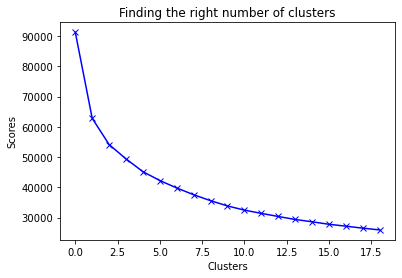

In [69]:
scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(prediction)
    scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-') #color blue
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

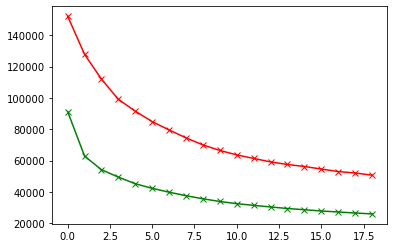

In [70]:
plt.plot(scores_1, 'bx-', color='r')
plt.plot(scores_2, 'bx-', color='g')

In [71]:
kmeans = KMeans(4)
kmeans.fit(prediction)
labels = kmeans.labels_

In [72]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [73]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(prediction)
pca_df = pd.DataFrame(data=prin_comp, columns = ['pca1','pca2'])

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.914729,-0.126901,0
1,1.862380,-1.035796,2
2,-0.362422,0.826076,3
3,-0.261893,-0.351504,0
4,-1.835266,0.045426,0


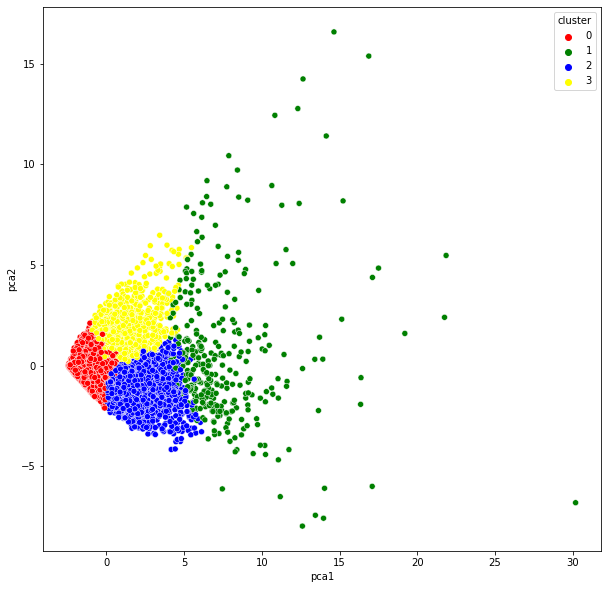

In [75]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y='pca2',hue='cluster',data=pca_df, palette=['red','green','blue','yellow'])

### END